In [18]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from urllib.request import urlopen 
import os
from matplotlib import pyplot as plt

In [20]:

print(os.listdir("../input"))

names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years']
c1,c2,c3,c4= np.loadtxt('../input/data.csv',unpack=True,delimiter = ',')
cancer_df = pd.read_csv('../input/data.csv', header=None, names=names)
print(cancer_df.head())

cancer_df.head()
cancer_df.tail()

['data.csv']
   age              ...                survival_status_after_5_years
0   30              ...                                            1
1   30              ...                                            1
2   30              ...                                            1
3   31              ...                                            1
4   31              ...                                            1

[5 rows x 4 columns]


,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [21]:
print(cancer_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [9]:
# print the unique valuesof the target column
print(list(cancer_df['survival_status_after_5_years'].unique()))


[1, 2]


In [22]:
# modify the target column values to be meaningful as well as categorical
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].map({1:"yes", 2:"no"})
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].astype('category')
print(cancer_df.head())

   age              ...                survival_status_after_5_years
0   30              ...                                          yes
1   30              ...                                          yes
2   30              ...                                          yes
3   31              ...                                          yes
4   31              ...                                          yes

[5 rows x 4 columns]


In [11]:
print(cancer_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


In [12]:
print(cancer_df.describe())


              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [13]:
print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("-"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Target variable distribution
yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
--------------------------------------------------
yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


In [ ]:
#L'âge des patients varie de 30 à 83 ans avec une médiane de 52 ans.
#Bien que le nombre maximum de ganglions lymphatiques positifs observés soit de 52,
   #près de 75% des patients ont moins de 5 ganglions lymphatiques positifs 
   #et près de 25% des patients n'ont pas de ganglions lymphatiques positifs.
#Le jeu de données ne contient qu'un petit nombre d'enregistrements (306).
#La colonne cible est déséquilibrée avec 73% des valeurs sont «oui»

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


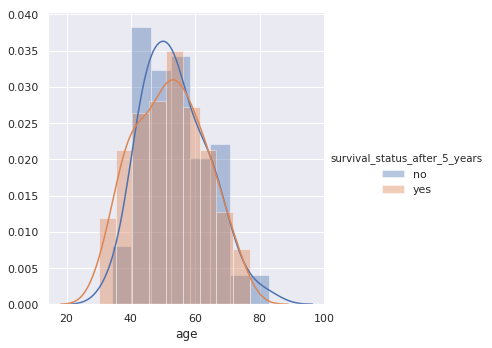

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


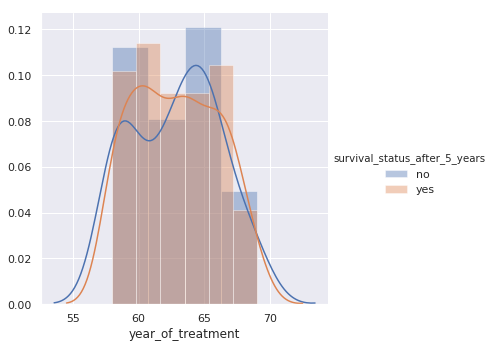

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


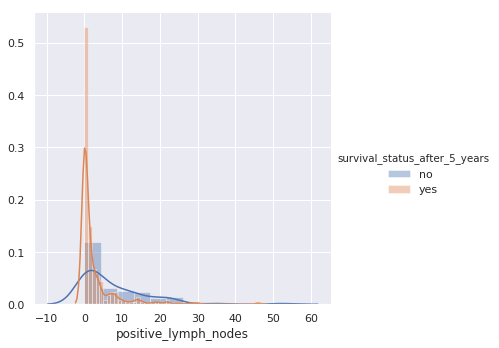

In [23]:
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    fg = sns.FacetGrid(cancer_df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [24]:
print("The age of patients are :",c1[0:5])
print("The year of operation are:",c2[0:5])
print("Number of positive axillary nodes detected are:",c3[0:5])
print("The labes (survived in 5 years[1-yes,2-no])",c4[0:5])

The age of patients are : [30. 30. 30. 31. 31.]
The year of operation are: [64. 62. 65. 59. 65.]
Number of positive axillary nodes detected are: [1. 3. 0. 2. 4.]
The labes (survived in 5 years[1-yes,2-no]) [1. 1. 1. 1. 1.]


In [16]:
x=np.column_stack((c1,c3))
y=c4

In [17]:
print(x[0:5])

[[30.  1.]
 [30.  3.]
 [30.  0.]
 [31.  2.]
 [31.  4.]]


Text(0,0.5,'No of positive axillary nodes')

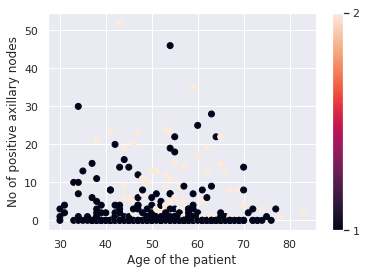

In [25]:
plt.scatter(c1,c3,c=c4)
plt.colorbar(ticks=[ 1, 2])
plt.xlabel("Age of the patient")
plt.ylabel("No of positive axillary nodes")

In [26]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x,y)
predictions=clf.predict(x)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predictions)

0.7483660130718954

In [ ]:
count = 0
for i in range(0,len(predictions)):
    if predictions[i]==y[i]:
        count+=1
    else:
        pass
accuracy = count/len(predictions)
print(accuracy)